## MAP Gaussian classes

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [31]:
def generate_GMM_samples(prior,number_of_samples=400,sig1=[[1,0],[0,1]],sig2=[[1,0],[0,1]],u1=[0,0],u2=[3,3]):
    '''
    Args:
    prior : prior of class 1. (prior of class 2 = 1 - prior (automatically))
    number_of_samples
    
    class 1- u_1, sig_1
    class 2- u_2, sig_2
    
    x is samples from zero-mean identity-covariance Gaussian sample generators

    generating class 1- A1*x+b1
    generating class 2- A2*x+b2
    
    For map, we need to find un-normalized posterior- P(x|L=i)P(L=i).  Let us call it Check(i) for class i. 
   
    Check(L=1)=N(u_1, sig_1)*Prior(L=1)
    Check(L=2)=N(u_2, sig_2)*Prior(L=2)

    '''
    from matplotlib.pyplot import figure
    figure(figsize=(10, 8))
    samples_class1=[]
    samples_class2=[]
    sig_1=np.matrix(sig1)
    sig_2=np.matrix(sig2)
    u_1=np.matrix(u1).transpose()
    u_2=np.matrix(u2).transpose()
    prior=prior
    A1=np.linalg.cholesky(sig_1)
    b1=u_1

    A2=np.linalg.cholesky(sig_2)
    b2=u_2

    zero_mean=[0,0]
    cov=[[1,0],[0,1]]
    for i in range(number_of_samples):
        uniform_sample=np.random.uniform()

        sample_from_zero_mean_identity_covariance=np.random.multivariate_normal(zero_mean,cov,[1]).transpose()

        if uniform_sample<prior:
            '''sample from class 1class 1'''
            sample=A1.dot(sample_from_zero_mean_identity_covariance)+b1
            samples_class1.append(sample)
        else:
            sample=A2.dot(sample_from_zero_mean_identity_covariance)+b2
            samples_class2.append(sample)
    samples_class1_final=np.hstack(samples_class1)
    samples_class2_final=np.hstack(samples_class2)
    a=np.squeeze(np.asarray(samples_class1_final.transpose()[:,1]))
    b=np.squeeze(np.asarray(samples_class1_final.transpose()[:,0]))

    c=np.squeeze(np.asarray(samples_class2_final.transpose()[:,1]))
    d=np.squeeze(np.asarray(samples_class2_final.transpose()[:,0]))
    plt.scatter(a,b,color='c',marker='2')
    plt.scatter(c,d,color='y',marker='x')
    mis_classify=[]
    for a in samples_class1_final.transpose():
        b= multivariate_normal(a.transpose(), 2, u_1, sig_1)*prior < multivariate_normal(a.transpose(), 2, u_2, sig_2)*(1-prior)
        if b==True:
            mis_classify.append(a)
    num_class1_mis_classify= (len(mis_classify))
    if len(mis_classify)==0:
        pass
    else:    
        class1_mis_classify=np.vstack(mis_classify).transpose()
        a=np.squeeze(np.asarray(class1_mis_classify.transpose()[:,1]))
        b=np.squeeze(np.asarray(class1_mis_classify.transpose()[:,0]))
        plt.scatter(a,b,color='b',marker='x')


    mis_classify=[]
    for a in samples_class2_final.transpose():
        b= multivariate_normal(a.transpose(), 2, u_1, sig_1)*prior > multivariate_normal(a.transpose(), 2, u_2, sig_2)*(1-prior)
        if b==True:
            mis_classify.append(a)
    num_class2_mis_classify= (len(mis_classify))

    if len(mis_classify)==0:
        pass
    else:
        class2_mis_classify=np.vstack(mis_classify).transpose()
        a=np.squeeze(np.asarray(class2_mis_classify.transpose()[:,1]))
        b=np.squeeze(np.asarray(class2_mis_classify.transpose()[:,0]))
        plt.scatter(a,b,color='r',marker='H');
    errors= num_class1_mis_classify+num_class2_mis_classify
    print ("P(error) = ",errors/400)

P(error) =  0.015


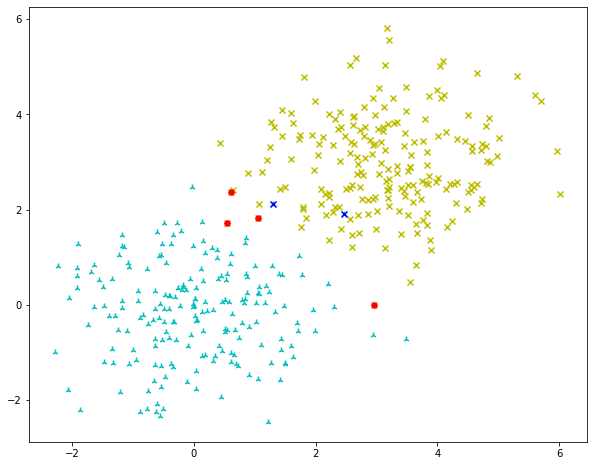

In [32]:
generate_GMM_samples(prior=0.5,number_of_samples=400,sig1=[[1,0],[0,1]],sig2=[[1,0],[0,1]],u1=[0,0],u2=[3,3])

P(error) =  0.0425


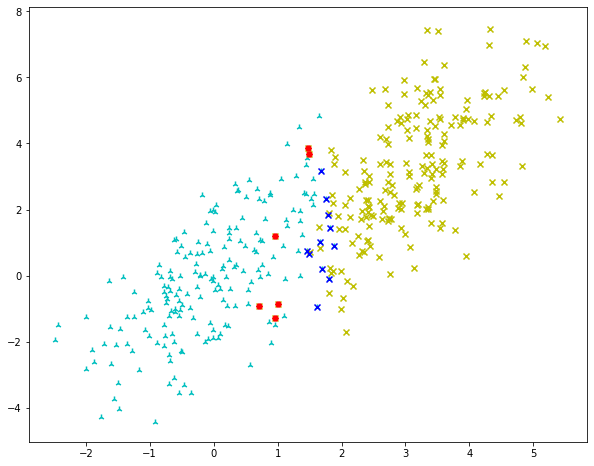

In [33]:
generate_GMM_samples(prior=0.5,number_of_samples=400,sig1=[[3,1],[1,0.8]],sig2=[[3,1],[1,0.8]],u1=[0,0],u2=[3,3])

P(error) =  0.105


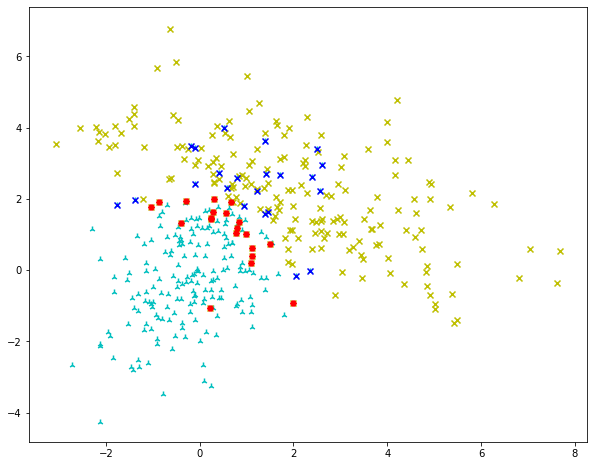

In [34]:
generate_GMM_samples(prior=0.5,number_of_samples=400,sig1=[[2,0.5],[0.5,1]],sig2=[[2,-1.9],[-1.9,5]],u1=[0,0],u2=[2,2])

P(error) =  0.005


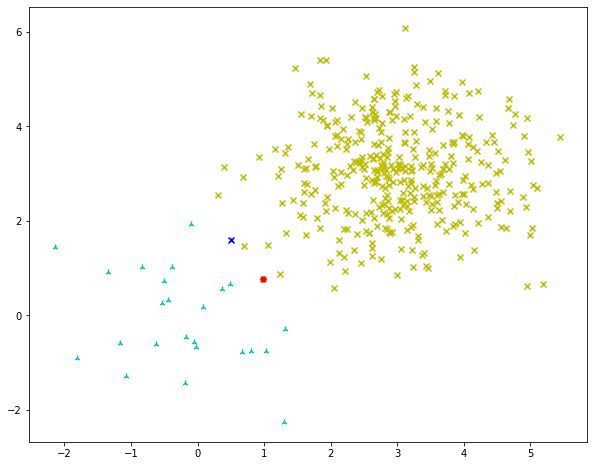

In [35]:
generate_GMM_samples(prior=0.05,number_of_samples=400,sig1=[[1,0],[0,1]],sig2=[[1,0],[0,1]],u1=[0,0],u2=[3,3])

P(error) =  0.015


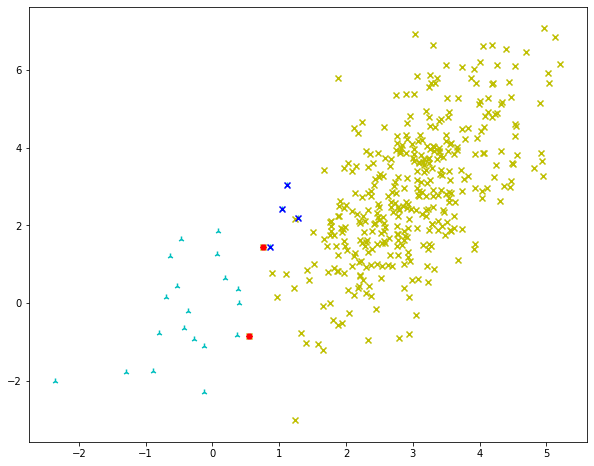

In [36]:
generate_GMM_samples(prior=0.05,number_of_samples=400,sig1=[[3,1],[1,0.8]],sig2=[[3,1],[1,0.8]],u1=[0,0],u2=[3,3])

P(error) =  0.03


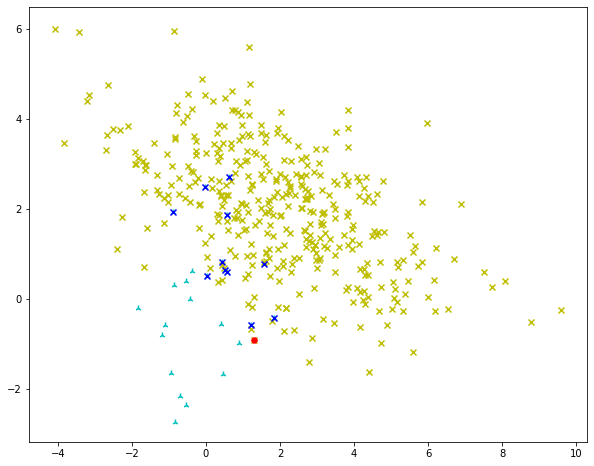

In [37]:
generate_GMM_samples(prior=0.05,number_of_samples=400,sig1=[[2,0.5],[0.5,1]],sig2=[[2,-1.9],[-1.9,5]],u1=[0,0],u2=[2,2])

### fun

In [28]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

In [29]:
univariate_normal(0,0,1)

0.3989422804014327

In [34]:
u1=[0,0]
u_1=np.matrix(u1).transpose()
sig1=[[1,0],[0,1]]
sig_1=np.matrix(sig1)
x=np.array([[0],[0]])
two_d_multivariate=multivariate_normal(x,2,u_1,sig_1)
two_d_multivariate

matrix([[0.15915494]])

In [35]:
one_d_mult_one_d=univariate_normal(0,0,1)*univariate_normal(0,0,1)
one_d_mult_one_d

0.15915494309189535

two_d_multivariate is same as one_d_mult_one_d. As expected, size the cov matrix has uncorrelated variables. Incase of gaussian, this implies independence. Since 2 variables are independent , their joint is product of probabilities